# Benchmark Datasets Retrieval and Processing

## Intro / Context

- **Author**: Andrés Carrillo López
- **Thesis Tutor**: Pablo Martínez Olmos
- **Master Thesis**: *'Time Series Forecasting using Transformers'*

**Goal of this notebook**: Identifying the benchmark datasets used in the time series forecasting literature reviewed (such as DeepAR, TFT and Informer papers), obtaining the Google-Research dataset processing scripts (to be as detailed to their used aggregated data as possible), and storing the aggregated datasets into the thesis' Drive folder for later usage in the different tested models.

From DeepAR paper (reference [9] in Google TFT paper)


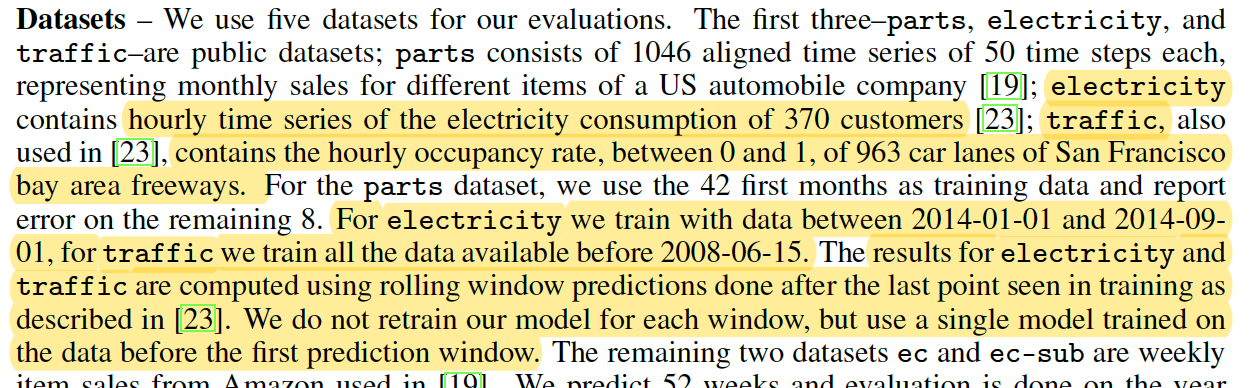

Original (raw) dataset sources:

- Electricity Dataset: https://archive.ics.uci.edu/ml/datasets/ElectricityLoadDiagrams20112014

- Traffic Dataset: https://archive.ics.uci.edu/ml/datasets/PEMS-SF

## Setup

In [30]:
# Required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,5)}) # just changing figure size

First I will create a 'data' folder on which we will store the final aggregated datasets in csv format.

In [24]:
!mkdir data
!mkdir data/traffic
!mkdir data/electr

### Cloning Google-Research Repo

This repo contains downloading and aggregation scripts for the benchmark datasets (used e.g. in their Temporal Fusion Transformer experiments, as well as rest of literature models).

In [ ]:
# For cloning a specific subfolder, better use subversion (git cannot)
!apt install subversion
!svn export https://github.com/google-research/google-research/trunk/tft

In [3]:
# check that the "tft" folder has been added to the tfm drive folder
!ls tft

data_formatters  README.md	   script_download_data.py
expt_settings	 requirements.txt  script_hyperparam_opt.py
libs		 run.sh		   script_train_fixed_params.py


### Importing the GoogleResearch' TFT processing library

In [13]:
%cd tft

/content/tft


In [6]:
# Making sure all needed libraries of Google lib and exact versions are matched
!pip install -r requirements.txt

     |████████████████████████████████| 81kB 4.7MB/s 
  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=232e387b3fcb51697d64acf9329fe617490f73aa561ada425452d019bee50769
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


## Traffic Dataset

#### Downloading and aggregating (hourly) data

This script (provided in Google repo) downloads the dataset from the UCI ML data repository and performs hourly aggregation.

In [ ]:
#(ommited long output)
!python3 script_download_data.py traffic traffic/

It has created a new folder named 'traffic' containing the formated data and some other folders. Again, I will only use the relevant files, so:

In [8]:
!ls traffic/data/traffic
# (PEMS-SF.zip is the original UCI ML non-aggregated raw data)

hourly_data.csv  PEMS_test	  PEMS_train	    randperm
PEMS-SF.zip	 PEMS_testlabels  PEMS_trainlabels  stations_list


We are interested in the 'hourly_data.csv' file, as is our processed and aggregated dataset.

In [25]:
!ls ../data

electr	traffic


In [26]:
# I will move the 'hourly_data.csv' file to the empty folder previously created 
!mv traffic/data/traffic/hourly_data.csv ../data/traffic/
!ls ../data/traffic/

hourly_data.csv


Hence, this will be the used aggregated (hourly basis) data

In [31]:
traffic_df_hourly = pd.read_csv("../data/traffic/hourly_data.csv", index_col=0)
traffic_df_hourly

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,values,prev_values,next_values,sensor_day,time_on_day,day_of_week,id,categorical_id,hours_from_start,categorical_day_of_week,categorical_time_on_day
0,0.019333,0.020933,0.020200,0,1,4,400000,400000,1.0,4,1
1,0.020200,0.019333,0.022450,0,2,4,400000,400000,2.0,4,2
2,0.022450,0.020200,0.029283,0,3,4,400000,400000,3.0,4,3
3,0.029283,0.022450,0.055483,0,4,4,400000,400000,4.0,4,4
4,0.055483,0.029283,0.073933,0,5,4,400000,400000,5.0,4,5
...,...,...,...,...,...,...,...,...,...,...,...
10160942,0.041400,0.053383,0.037300,172,19,5,402090,402090,4147.0,5,19
10160943,0.037300,0.041400,0.035400,172,20,5,402090,402090,4148.0,5,20
10160944,0.035400,0.037300,0.029750,172,21,5,402090,402090,4149.0,5,21
10160945,0.029750,0.035400,0.022700,172,22,5,402090,402090,4150.0,5,22


In [122]:
# Exporting aggregated dataset csv to Google Drive for later use:
# (Note: my Google Drive has been synced with this colab notebook previously)

!cp "../data/traffic/hourly_data.csv" "../drive/MyDrive/Máster Big Data (2020-2021)/TFM/Code Notebooks/data/traffic/"
!ls "../drive/MyDrive/Máster Big Data (2020-2021)/TFM/Code Notebooks/data/traffic/"

hourly_data.csv


### Exploring the Traffic dataset target variable

In [ ]:
start_t = 168 # starting e.g. from second week.

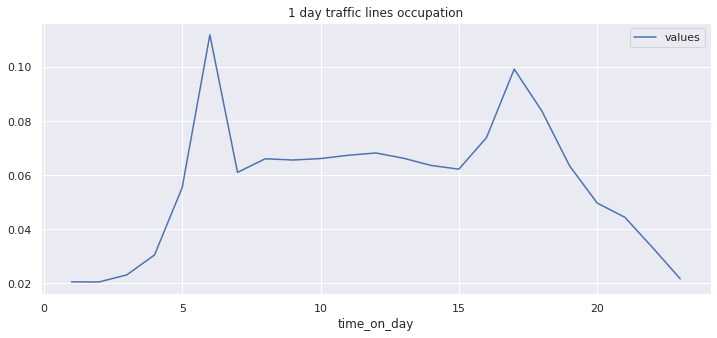

In [110]:
traffic_df_hourly[traffic_df_hourly["categorical_id"]==400000][start_t:start_t+23]\
                 .plot(x='time_on_day', y='values',title="1 day traffic lines occupation");

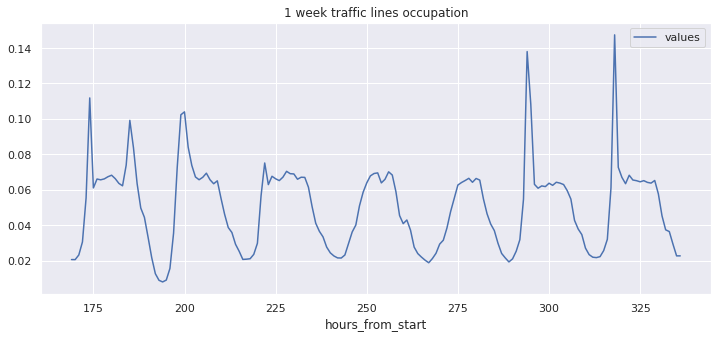

In [107]:
traffic_df_hourly[traffic_df_hourly["categorical_id"]==400000][start_t:start_t+168]\
                 .plot(x='hours_from_start', y='values',title="1 week traffic lines occupation");

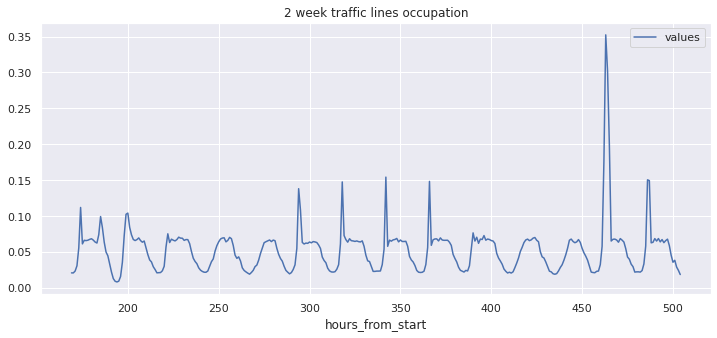

In [111]:
traffic_df_hourly[traffic_df_hourly["categorical_id"]==400000][start_t:start_t+336]\
                 .plot(x='hours_from_start', y='values',title="2 week traffic lines occupation");

Probably, around 470 hrs from start it was a holiday, or a particular event blocked the road.

## Electricity Dataset

Similar drill as before, but now with the electricity data.

#### Downloading and aggregating hourly data

This script (provided in Google repo) downloads the dataset from the UCI ML data repository and performs hourly aggregation.

In [35]:
!ls

data_formatters  README.md		  script_hyperparam_opt.py
expt_settings	 requirements.txt	  script_train_fixed_params.py
__init__.py	 run.sh			  traffic
libs		 script_download_data.py


In [ ]:
# (ommited long output)
!python3 script_download_data.py electricity electr/

It has created a new folder named 'electr' containing the formated data and some other folders. I will only use the relevant files, so:

In [37]:
!ls electr/data/electricity
# (LD2011_2014.txt is the original UCI ML non-aggregated raw data)

hourly_electricity.csv	LD2011_2014.txt  LD2011_2014.txt.zip  __MACOSX


Again, I will move the 'hourly_electricity.csv' file to the empty folder previously created:

In [38]:
!mv electr/data/electricity/hourly_electricity.csv ../data/electr/
!ls ../data/electr/

hourly_electricity.csv


In [39]:
electr_df_hourly = pd.read_csv("../data/electr/hourly_electricity.csv", index_col=0)
electr_df_hourly

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,power_usage,t,days_from_start,categorical_id,date,id,hour,day,day_of_week,month,hours_from_start,categorical_day_of_week,categorical_hour
17544,2.538071,26304.0,1096,MT_001,2014-01-01 00:00:00,MT_001,0,1,2,1,26304.0,2,0
17545,2.855330,26305.0,1096,MT_001,2014-01-01 01:00:00,MT_001,1,1,2,1,26305.0,2,1
17546,2.855330,26306.0,1096,MT_001,2014-01-01 02:00:00,MT_001,2,1,2,1,26306.0,2,2
17547,2.855330,26307.0,1096,MT_001,2014-01-01 03:00:00,MT_001,3,1,2,1,26307.0,2,3
17548,2.538071,26308.0,1096,MT_001,2014-01-01 04:00:00,MT_001,4,1,2,1,26308.0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10461482,20824.324324,32299.0,1345,MT_370,2014-09-07 19:00:00,MT_370,19,7,6,9,32299.0,6,19
10461483,19527.027027,32300.0,1345,MT_370,2014-09-07 20:00:00,MT_370,20,7,6,9,32300.0,6,20
10461484,20202.702703,32301.0,1345,MT_370,2014-09-07 21:00:00,MT_370,21,7,6,9,32301.0,6,21
10461485,19851.351351,32302.0,1345,MT_370,2014-09-07 22:00:00,MT_370,22,7,6,9,32302.0,6,22


Note that scaling the data will be required.

Again, we proceed to copy this aggregated data to google drive for later usage with the models:

In [123]:
# (Note: my Google Drive has been synced with this colab notebook previously)

!cp "../data/electr/hourly_electricity.csv" "../drive/MyDrive/Máster Big Data (2020-2021)/TFM/Code Notebooks/data/electr/"
!ls "../drive/MyDrive/Máster Big Data (2020-2021)/TFM/Code Notebooks/data/electr/"

hourly_electricity.csv


### Exploring the Electricity Dataset target variable

We can take a look at the target variable (power usage) for a 1 day, 1 week and 2 week ahead time:

In [64]:
start_t = 168 # starting e.g. from second week.

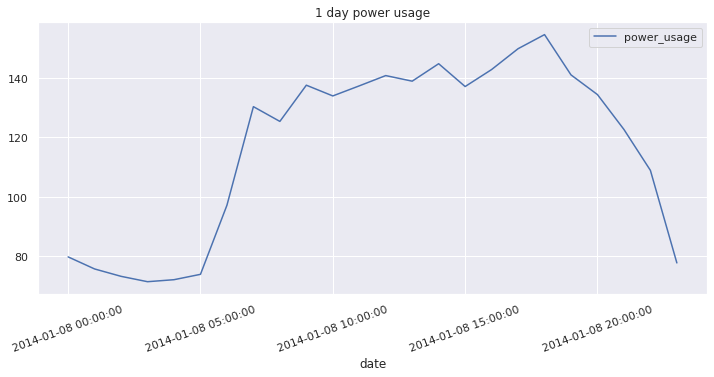

In [65]:
electr_df_hourly[electr_df_hourly["id"]=="MT_300"][["date","power_usage"]][start_t:start_t+24].set_index("date").plot(title="1 day power usage");
plt.xticks(rotation=20);

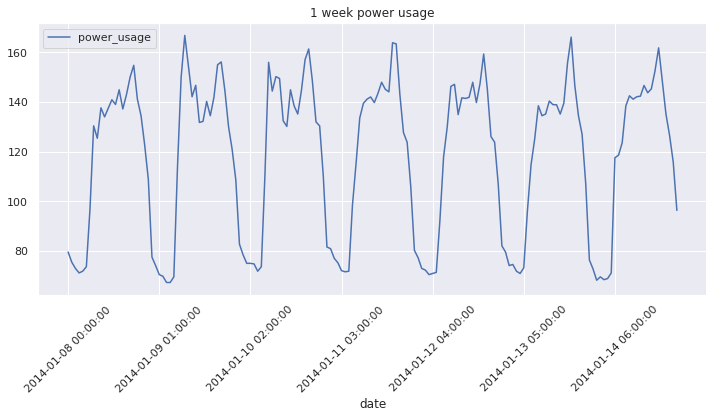

In [66]:
electr_df_hourly[electr_df_hourly["id"]=="MT_300"][["date","power_usage"]][start_t:start_t+168].set_index("date").plot(title="1 week power usage");
plt.xticks(rotation=45);

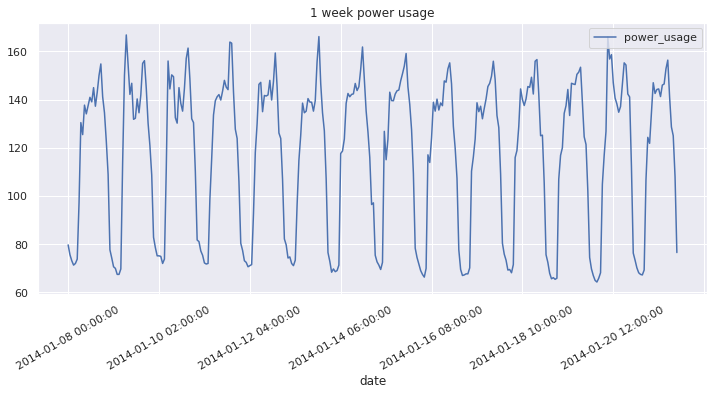

In [71]:
electr_df_hourly[electr_df_hourly["id"]=="MT_300"][["date","power_usage"]][start_t:start_t+336].set_index("date").plot(title="1 week power usage");
plt.xticks(rotation=30);